In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# Initialize the FRED API with your key
fred = Fred(api_key='f627263bab3fa1589c5af9bf6c822033') # Replace my APIKEY with "YOUR_API_KEY"

# List of Treasury yield series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="1975-01-01", observation_end="2024-05-03")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', \
                  '7 Year', '10 Year', '20 Year', '30 Year']

In [5]:
# Make datetime as the index
yields.index = pd.to_datetime(yields.index)

In [6]:
# Drop NaN in the dataset
yields = yields.dropna()

In [7]:
# Calculate covariance matrix for US Treasury yields in the dataset
covariance_matrix = yields.cov()
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
          1 Month   3 Month   6 Month    1 Year    2 Year    3 Year    5 Year  \
1 Month  2.909927  2.946278  2.948709  2.812408  2.499031  2.251515  1.850674   
3 Month  2.946278  3.004493  3.018967  2.887166  2.571375  2.317856  1.901841   
6 Month  2.948709  3.018967  3.051413  2.931246  2.624882  2.372696  1.951042   
1 Year   2.812408  2.887166  2.931246  2.836161  2.569272  2.340278  1.944752   
2 Year   2.499031  2.571375  2.624882  2.569272  2.388302  2.216908  1.897526   
3 Year   2.251515  2.317856  2.372696  2.340278  2.216908  2.092766  1.842915   
5 Year   1.850674  1.901841  1.951042  1.944752  1.897526  1.842915  1.714385   
7 Year   1.565717  1.605385  1.647697  1.654011  1.648671  1.634697  1.582433   
10 Year  1.315260  1.344596  1.381242  1.395294  1.418752  1.435157  1.447139   
20 Year  1.078020  1.098030  1.128773  1.154327  1.214425  1.267258  1.350980   
30 Year  0.862766  0.872645  0.893530  0.919017  0.988536  1.052167  1.161403   

        

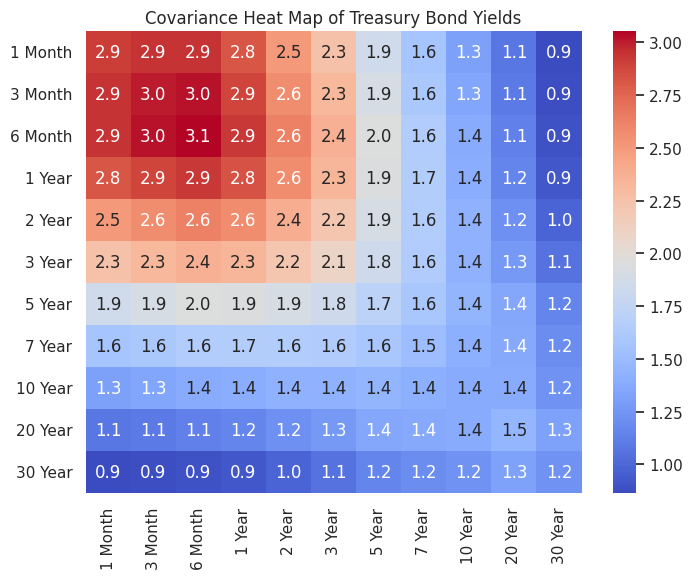

In [6]:
#Make a heatmap for covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Covariance Heat Map of Treasury Bond Yields')
plt.show()

In [9]:
# Calculate correlation matrix for US Treasury yields in the dataset
correlation_matrix = yields.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          1 Month   3 Month   6 Month    1 Year    2 Year    3 Year    5 Year  \
1 Month  1.000000  0.996431  0.989556  0.978975  0.947951  0.912375  0.828580   
3 Month  0.996431  1.000000  0.997062  0.989056  0.959920  0.924359  0.837981   
6 Month  0.989556  0.997062  1.000000  0.996406  0.972332  0.938926  0.853025   
1 Year   0.978975  0.989056  0.996406  1.000000  0.987188  0.960598  0.881951   
2 Year   0.947951  0.959920  0.972332  0.987188  1.000000  0.991614  0.937754   
3 Year   0.912375  0.924359  0.938926  0.960598  0.991614  1.000000  0.972950   
5 Year   0.828580  0.837981  0.853025  0.881951  0.937754  0.972950  1.000000   
7 Year   0.748376  0.755164  0.769085  0.800794  0.869836  0.921350  0.985414   
10 Year  0.656702  0.660700  0.673469  0.705664  0.781916  0.844962  0.941356   
20 Year  0.523785  0.525045  0.535579  0.568108  0.651319  0.726060  0.855190   
30 Year  0.456151  0.454056  0.461334  0.492170  0.576905  0.655966  0.799992   

       

Next, let's make a heatmap for the correlation matrix to better read the result.

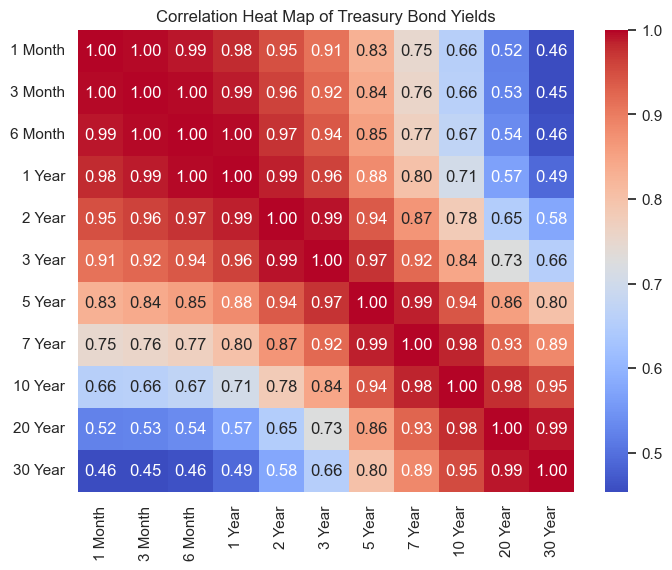

In [10]:
# Make a heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heat Map of Treasury Bond Yields')
plt.show()

In [11]:
#Calculate means for all yields in the dataset
yield_means = yields.mean()
print("Yield Means:")
print(yield_means)


Yield Means:
1 Month    1.449053
3 Month    1.518396
6 Month    1.627451
1 Year     1.717973
2 Year     1.905475
3 Year     2.097270
5 Year     2.485802
7 Year     2.806259
10 Year    3.088349
20 Year    3.620395
30 Year    3.724571
dtype: float64


In [12]:
#Calculate standard deviations for all yields in the dataset
yield_stds = yields.std()
print("Yield Standard Deviations:")
print(yield_stds)

Yield Standard Deviations:
1 Month    1.705851
3 Month    1.733347
6 Month    1.746829
1 Year     1.684091
2 Year     1.545413
3 Year     1.446639
5 Year     1.309345
7 Year     1.226457
10 Year    1.174092
20 Year    1.206514
30 Year    1.108774
dtype: float64


In [14]:
# Now create a standardized US Treasury yield dataset
standardized_data = (yields - yield_means) / yield_stds
print("Standardized Yield (first 5 rows):")
print(standardized_data.head())


Standardized Yield (first 5 rows):
             1 Month   3 Month   6 Month    1 Year    2 Year    3 Year  \
2001-07-31  1.301958  1.166300  1.054796  1.075968  1.219431  1.356751   
2001-08-01  1.290234  1.160531  1.054796  1.093781  1.245314  1.377489   
2001-08-02  1.290234  1.160531  1.049071  1.099719  1.284139  1.432789   
2001-08-03  1.278510  1.154762  1.054796  1.099719  1.297080  1.467352   
2001-08-06  1.272647  1.154762  1.054796  1.093781  1.277668  1.432789   

              5 Year    7 Year   10 Year   20 Year   30 Year  
2001-07-31  1.591786  1.674532  1.687817  1.649052  1.610273  
2001-08-01  1.629973  1.707147  1.721886  1.665629  1.628311  
2001-08-02  1.683435  1.764222  1.772989  1.707071  1.664387  
2001-08-03  1.706348  1.780529  1.798541  1.723647  1.682425  
2001-08-06  1.698710  1.780529  1.790023  1.723647  1.682425  


### **Derive Principal Components**


In [1]:
import numpy as np
from numpy import linalg as LA

In [16]:
# Calculate covariance matrix of the standardized dataset
std_data_cov = standardized_data.cov()

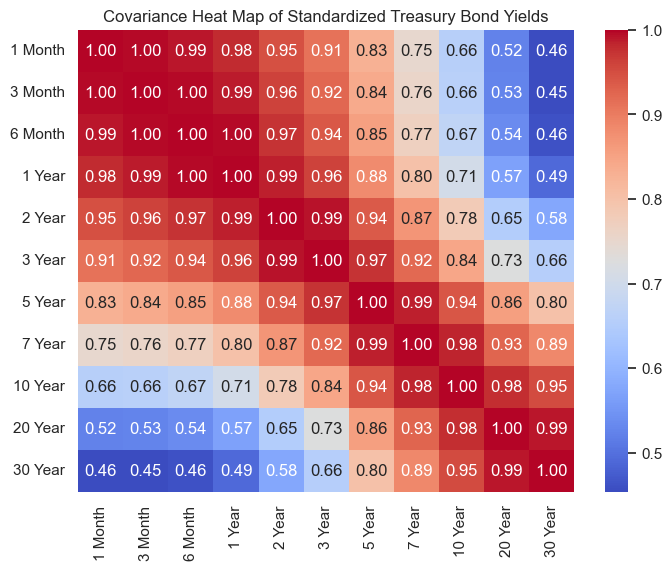

In [17]:
# Draw a heatmap of the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(std_data_cov, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Heat Map of Standardized Treasury Bond Yields')
plt.show()

In [19]:
# Calculate eigenvectors and eigenvalues of the covariance matrix of standardized yield dataset
eigenvalues, eigenvectors = LA.eig(std_data_cov)
eigenvalues

array([9.22236235e+00, 1.63341019e+00, 1.17347718e-01, 1.46747161e-02,
       5.37172584e-03, 3.70149555e-03, 1.61309240e-03, 6.97458739e-04,
       4.12103724e-04, 2.47130907e-04, 1.62022336e-04])

In [20]:
eigenvectors

array([[ 0.29838306,  0.30407626,  0.44114252, -0.53274513,  0.16709103,
         0.3702677 ,  0.33473909, -0.24039038,  0.02716335, -0.06687106,
        -0.00401581],
       [ 0.3004742 ,  0.30709453,  0.3256805 , -0.10407045, -0.09017425,
        -0.13428768, -0.45363295,  0.58333199, -0.13905681,  0.31674937,
         0.08135824],
       [ 0.30335843,  0.29873569,  0.17614053,  0.25730089, -0.24045099,
        -0.34295333, -0.10807462, -0.13460411,  0.32846299, -0.58367918,
        -0.26019232],
       [ 0.30894871,  0.26727645, -0.00945148,  0.42112655, -0.09742097,
        -0.16475673,  0.15471834, -0.48093818, -0.17006916,  0.43202651,
         0.38500876],
       [ 0.31879358,  0.17616334, -0.28944958,  0.31333639,  0.25331718,
         0.2316792 ,  0.23709616,  0.21742618, -0.3594238 ,  0.02750551,
        -0.57801452],
       [ 0.32383758,  0.08574516, -0.41253571,  0.06981027,  0.2557664 ,
         0.27857918, -0.04283274,  0.253605  ,  0.24613993, -0.32221553,
         0.582

From the above output, we can see that the eigenvalues and corresponding eigenvectors are ordered in descending order by the values of eigenvalues. In PCA, we also call eigenvectors **loadings**. We will see why this is important later.
<br>

We can view this collection of all eigenvectors as a linear transformation matrix to the standardized dataset. The transformed data will have a very interesting feature that we will introduce soon. Let's transform the standardized data with eigenvectors first.


In [21]:
# Transform standardized data with Loadings
principal_components = standardized_data.dot(eigenvectors)
principal_components.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5","PC_6","PC_7","PC_8","PC_9","PC_10","PC_11"]
principal_components.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11
2001-07-31,4.608202,-0.918184,0.138746,-0.223360,0.013690,0.063247,0.008572,0.006278,0.002652,0.017945,-0.002084
2001-08-01,4.665170,-0.950595,0.102492,-0.220182,0.013318,0.054096,0.014505,0.002266,0.000391,0.027474,-0.006491
2001-08-02,4.766161,-1.009754,0.054519,-0.230244,0.021179,0.064157,0.017119,0.011726,-0.002439,0.025895,-0.003628
2001-08-03,4.807092,-1.038602,0.027695,-0.224234,0.025575,0.063723,0.018644,0.020406,0.009374,0.017296,0.002344
2001-08-06,4.781112,-1.044855,0.048161,-0.228694,0.013594,0.051783,0.009102,0.010319,0.003817,0.021904,-0.007042


In [22]:
# Put data into a DataFrame
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,12))

# Work out explained proportion
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,9.222362,83.84%
2,1.633410,14.85%
3,0.117348,1.07%
4,0.014675,0.13%
5,0.005372,0.05%
6,0.003701,0.03%
7,0.001613,0.01%
8,0.000697,0.01%
9,0.000412,0.00%
10,0.000247,0.00%


### **Principal Component Analysis for U.S. Treasury Yield**


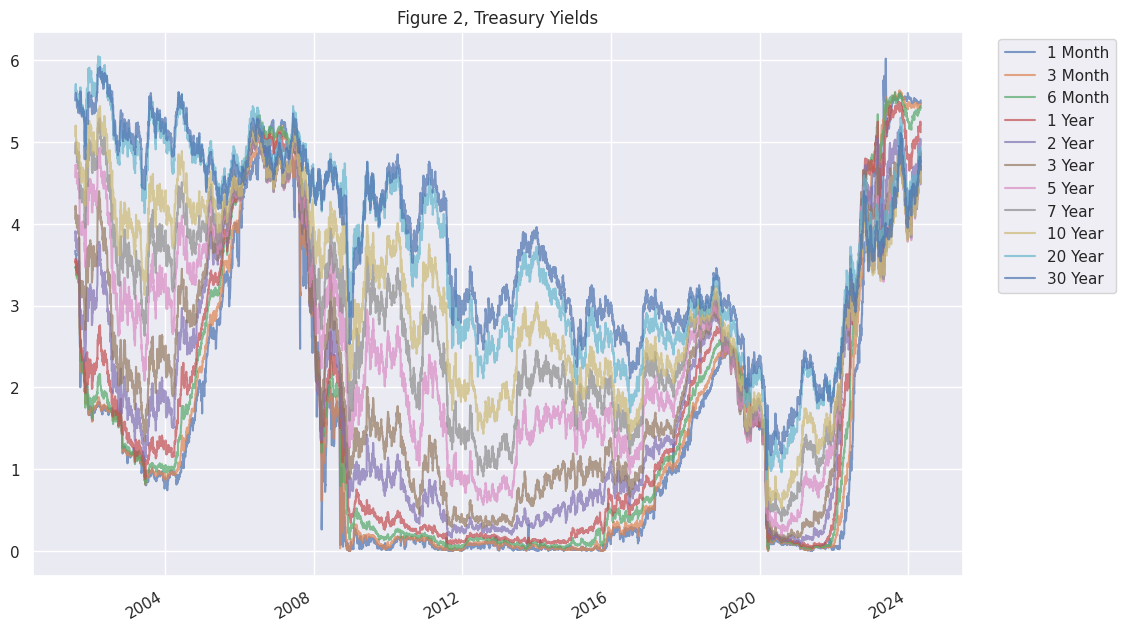

In [20]:
# Treasury Yield Curve
yields.plot(figsize=(12, 8), title='Figure 2, Treasury Yields', alpha=0.7) # Plot the yields
plt.legend(bbox_to_anchor=(1.03, 1))
plt.show()

Now, let's draw principal components. Let's start from PC_1.

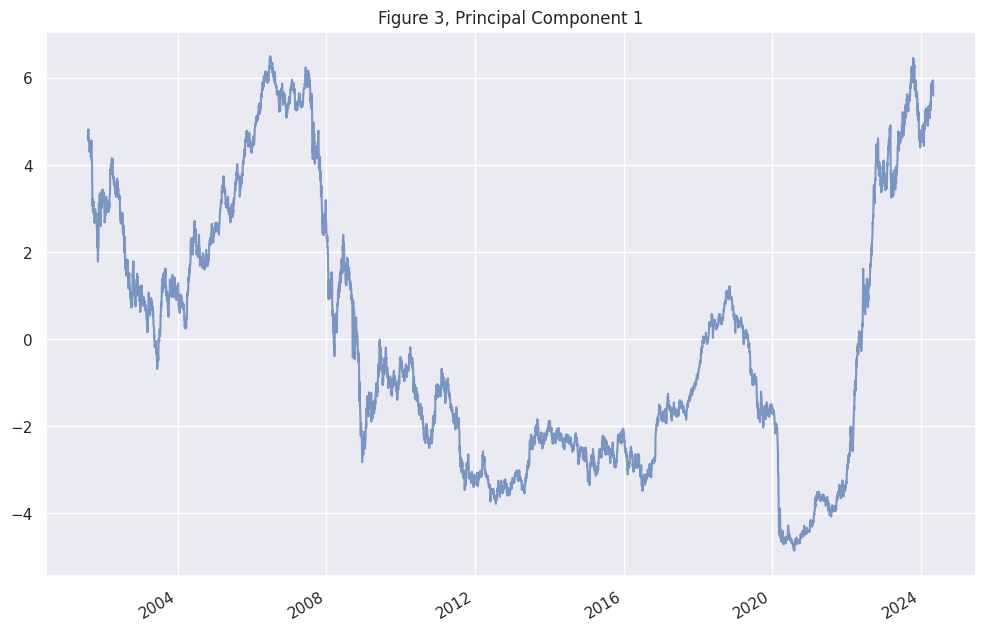

In [21]:
# Plot PC_1
principal_components["PC_1"].plot(figsize=(12, 8), title='Figure 3, Principal Component 1', alpha=0.7)
plt.show()

In [27]:
#Calculate slope (difference) of 2-year Treasury yield and 10-year Treasury yield
df_s = pd.DataFrame(data = standardized_data)
df_s = df_s[["2 Year","10 Year"]]
df_s["Tilt"] = df_s["2 Year"] - df_s["10 Year"]
df_s.head()

,2 Year,10 Year,Tilt
2001-07-31,1.219431,1.687817,-0.468386
2001-08-01,1.245314,1.721886,-0.476571
2001-08-02,1.284139,1.772989,-0.488850
2001-08-03,1.297080,1.798541,-0.501460
2001-08-06,1.277668,1.790023,-0.512355


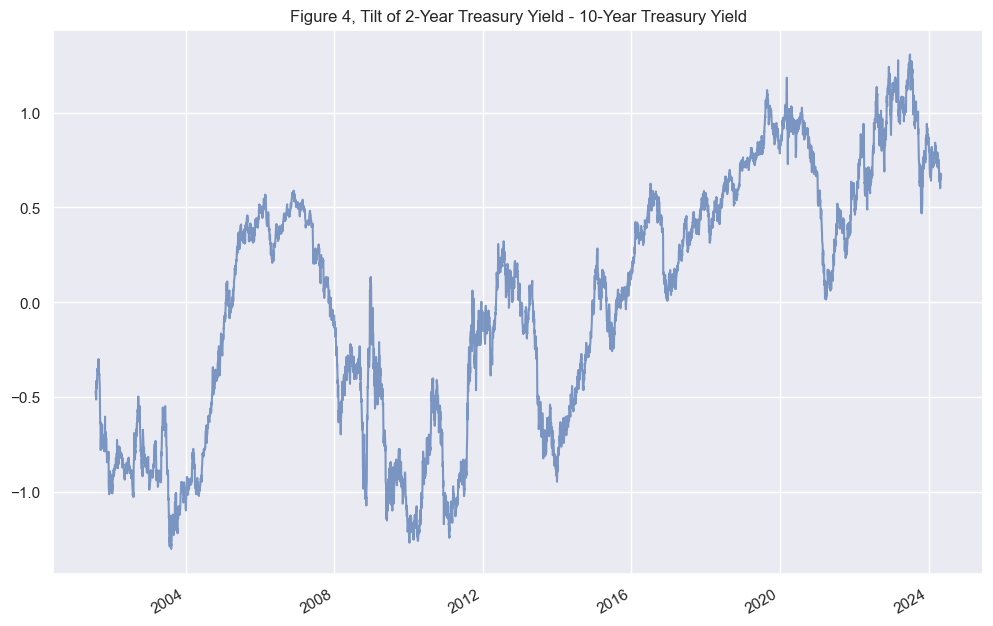

In [24]:
# Draw the graph of Slope of 2-Year Treasury Yield - 10-Year Treasury Yield
df_s["Tilt"].plot(figsize=(12, 8), title='Figure 4, Tilt of 2-Year Treasury Yield - 10-Year Treasury Yield', alpha=0.7) # Plot the yields difference
plt.show()

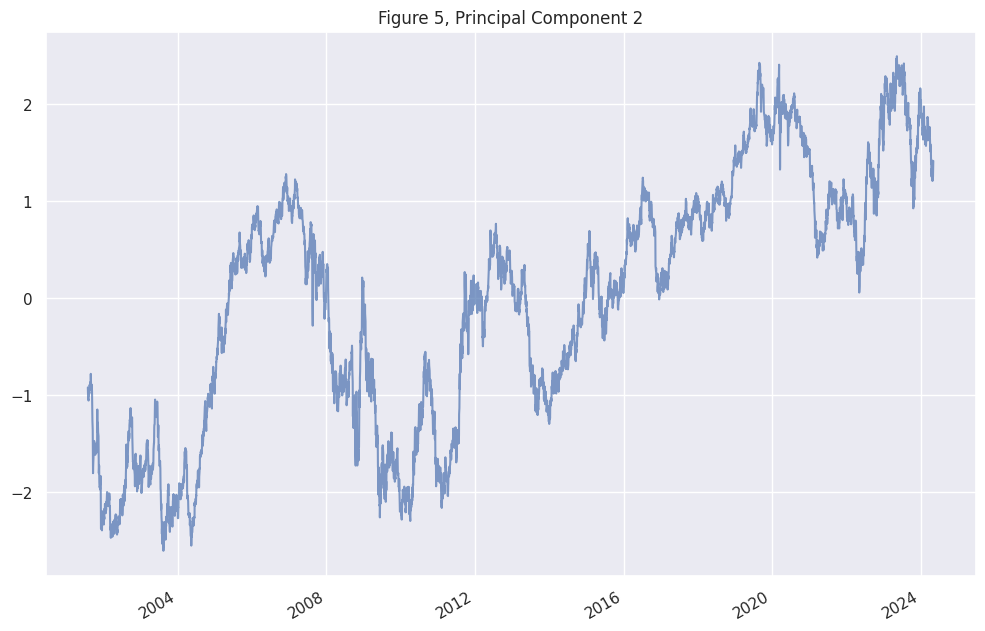

In [24]:
# Draw the graph for PC_2
principal_components["PC_2"].plot(figsize=(12, 8), title='Figure 5, Principal Component 2', alpha=0.7) # Plot the yields
plt.show()

In [28]:
np.corrcoef(principal_components["PC_2"], df_s["Tilt"])

array([[1.        , 0.97850538],
       [0.97850538, 1.        ]])

The above code shows that the correlation of PC_2 and Tilt is 97%, which is very high. Hence, we can use the PC_2 as a proxy to analyze how tilted the yield curve is.
<br>
<br>
Now let's draw PC_3, the change of curvature of the yield curve.

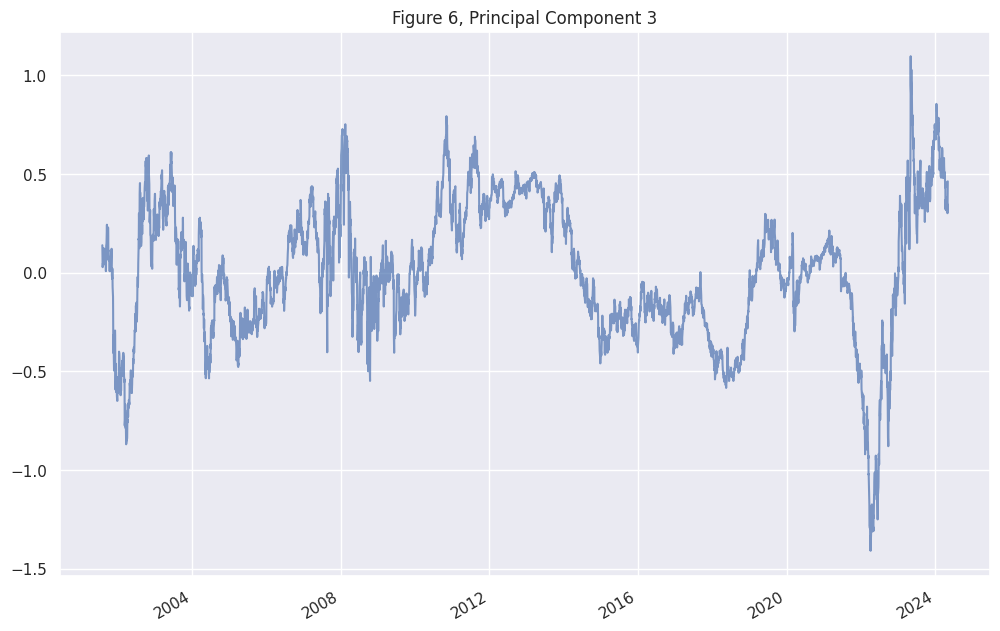

In [27]:
# Draw the graph for PC_3
principal_components["PC_3"].plot(figsize=(12, 8), title='Figure 6, Principal Component 3', alpha=0.7) # Plot the yields
plt.show()

From Figure 6, we can see that the change in curvature of the yield curve oscillates around 0.

## **Value at Risk for a Fixed-Income Portfolio**

### **Value at Risk (VaR)**

### **VaR for a Simple Treasury Bond Portfolio**


In [29]:
# Create a dataset with 3 Treasury bond yields and calculate the yield changes
var_dataset = yields[["2 Year","5 Year","10 Year"]]
var_yield_chng_dataset = var_dataset.pct_change()
var_yield_chng_dataset = var_yield_chng_dataset.dropna()
var_yield_chng_dataset.head()

,2 Year,5 Year,10 Year
2001-08-01,0.010554,0.010941,0.007890
2001-08-02,0.015666,0.015152,0.011742
2001-08-03,0.005141,0.006397,0.005803
2001-08-06,-0.007673,-0.002119,-0.001923
2001-08-07,0.005155,0.002123,0.001927


In [30]:
# Standardize the dataset
var_yield_chng_dataset_means = var_yield_chng_dataset.mean()
var_yield_chng_dataset_stds = var_yield_chng_dataset.std()
var_yld_chng_stnd_data = (var_yield_chng_dataset - var_yield_chng_dataset_means) / var_yield_chng_dataset_stds

In [34]:
# Calculate eienvectors and eigenvalues and rank by eigenvalues
var_cov_matrix = var_yld_chng_stnd_data.cov()
eigenvalues, eigenvectors = np.linalg.eig(var_cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
pca_components = eigenvectors[:, sorted_indices]

Let's check eigenvalues and how much variance of the data is explained by an eigenvector.

In [35]:
# Put data into a DataFrame
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,4))

# Work out explained proportion
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,2.545146,84.84%
2,0.384763,12.83%
3,0.070091,2.34%


From the above table, we can see the first two eigenvectors account for 97% of the variance in the dataset. Hence, we are going to select the first two eigenvectors for analysis.

In [40]:
# Choose number of components (e.g., 2)
n_components = 2
selected_components = pca_components[:, :n_components]

Next, let's assume that our simple bond portfolio consists of \$2 million in 2-year Treasury bonds, \$2 million in 5-year Treasury bonds, and \$1 million in 10-year Treasury bonds.

In [37]:
# Define a simple portfolio
portfolio = {
    2: 2000000,  # $2M in 2-year bond
    5: 2000000,  # $2M in 5-year bond
    10: 1000000  # $1M in 10-year bond
}

Next, we will calculate bond sensitivities in the portfolio. We assume the bond durations are the same as their maturity for simplicity. Then, we can calculate the portfolio value changes and VAR.

In [44]:
# Calculate portfolio sensitivities (assuming duration = maturity for simplicity)
sensitivities = np.array([maturity * amount for maturity, amount in portfolio.items()])

# Calculate portfolio value changes
portfolio_changes = (var_yield_chng_dataset*sensitivities) @ selected_components

# Calculate VaR
confidence_level = 0.95  # 95% VaR
var = -np.percentile(portfolio_changes, 100 * (1 - confidence_level))

print(f"1-day 95% VaR: ${var:,.2f}")

# Display summary statistics
print("\nSummary Statistics:")
print(f"Portfolio Value: ${sum(portfolio.values()):,.2f}")
print(f"VaR as % of Portfolio Value: {var / sum(portfolio.values()) * 100:.3f}%")

1-day 95% VaR: $458,248.59

Summary Statistics:
Portfolio Value: $5,000,000.00
VaR as % of Portfolio Value: 9.165%


The above result shows that the 1-day VaR at 95% confidence level for our simple Treasury bond portfolio is $458,249. It is about 9% of the total portfolio value. The above example demonstrates how to use the feature extraction method to reduce the portfolio dataset and use the smaller dataset to calculate VaR.

